# Metropolis Hastings

En esta sección vamos a ver tres métodos diferentes para generar una muestra de
puntos que sigan una distribución determinada.  
La función de distribución que vamos a utilizar es $\sin(x)/2$ en el intervalo $0<x<\pi$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
n_puntos=1000
x = np.linspace(0, np.pi)
def f(x):
    return 0.5 * np.sin(x)

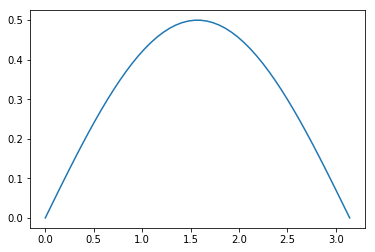

In [47]:
plt.plot(x, f(x))


# Fuerza Bruta

El primer metodo que vamos a utlizar para generar $N$ puntos que sigan esta distribucion es fuerza bruta.

Vamos a generar un punto $x_i$ de una distribucion uniforme entre $0$ y $\pi$, para cada punto generamos 
un segundo n\'umero aleatorio $y_i$ de una distribuci\'on uniforme entre $0$ y el m\'aximo de f(x), que en este caso es 0.5 y nos preguntamos si $y_i<f(x_i)$ entonces incluimos a $x_i$ en la lista, si no se cumple esta condicion descartamos a ese punto $x_i$ para generar uno nuevo.

Escrito en codigo este metodo se ve asi

In [48]:
N = 100000

n_adentro = 0
n_intentos = 0
lista = []
while n_adentro < N:
    x_i = np.random.random()*np.pi
    y_i = np.random.random()/2.0
    n_intentos += 1
    if(y_i < f(x_i)):
        lista.append(x_i)
        n_adentro +=1 


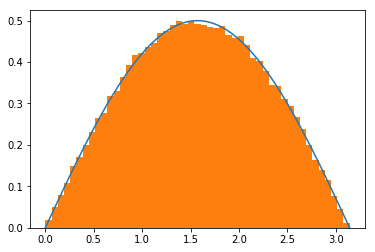

In [49]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

El problema es que tuvimos que generar muchos mas numeros (`n_intentos`) de los que al final 
terminaron en la lista `n_adentro`

In [50]:
print(n_adentro/n_intentos)

0.6361808789475023


# Integraci\'on anal\'itica

El segundo m\'etodo utiliza la integral cumulativa  $g(x) = \int_0^x f(y)dy$ que por definici\'on se
encuentra entre 0 y 1. En nuestro ejemplo tenemos $g(x)=-cos(x)/2 + 1/2$

In [51]:
def cumul_f(x):
    return - 0.5 * np.cos(x) + 0.5

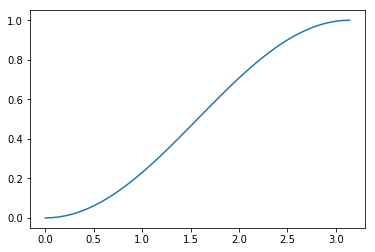

In [52]:
plt.plot(x, cumul_f(x))

Si generamos puntos $z_i$ con una distribucion uniforme entre 0 y 1, y calculamos $x_i=g^{-1}(z_i)$ todos los $x_i$ van a seguir la distribucion $f(x)$.

En nuestro caso $g^{-1}(x)$ es $\arccos(-2.0*(x-0.5))$

In [53]:
def inversa_cumul_f(x):
    return np.arccos(-2.0*(x-0.5))

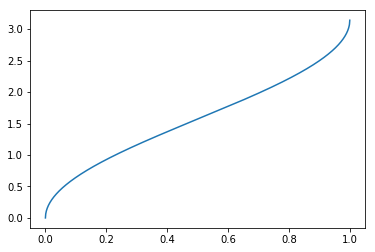

In [57]:
z = np.linspace(0,1.0, n_puntos)
plt.plot(z, inversa_cumul_f(z))

In [60]:
#De esta manera solamente tenemos que calcular

N = 100000
z = np.random.random(N)
lista = inversa_cumul_f(z)

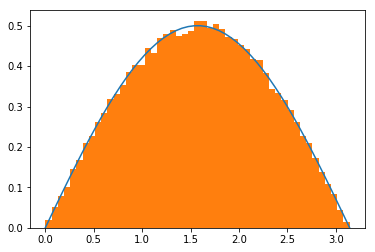

In [61]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

La desventaja de este metodo es que solamente es util si podemos integrar e invertir analiticamente la funcion de distribucion.

In [ ]:
# 